## Generative Adversarial Network (GAN) and Image Generation
- a new framework for estimating generative models via an adversarial process where we train two models: 
    - a __generative model__ $G$ that __captures the data distribution__ and 
    - a discriminative model $D$ that estimates the probability that sample came from training data rather than $G$
- The training procedure for G is to maximize probability of D making a mistake
- In the space of arbitrary functions G and D, a unique solution exists with G recovering the training data distribution and D equal to 0.5 everywhere
- If $G$ and $D$ are defined as multi-layer perceptrons, entire system can be trained via back-propagation

### Use Cases
- helps synthesize new data samples using just random noise trained iteratively via a advesarial process
- a major breakthrough in Deep Learning that allows one to generate new data such as new images that has same distribution as training set.  
- __Goal of GANs__ is to capture the training data distribution so that we can generate new data from that same distribution.  
- In other words, we  want to create new data from random noise that has same distribution as its training set.
- considered to be unsupervised learning algorithm since no label is required.  But extensions are available that can be used in supervised domains

## Visual Inspection of GAN Archecture
- Image below shows typical GAM Architecture

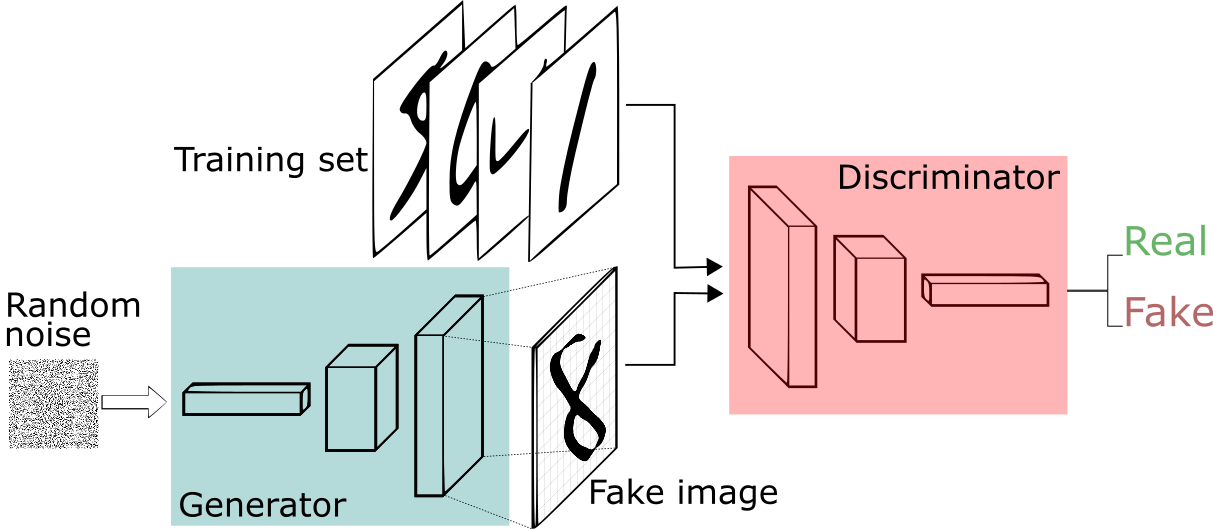

In [4]:
from PIL import Image
import os
path = os.path.join(os.getcwd(), 'neptunevision','generative_advesarial_network', 'download.png')
Image.open(path)

## GANs Problem Statement
__Task__

We want to sample from complex, high dimensional training distribution.  There is no direct way to do this

__Solution__

Sample from simple distribution, e.g __random noise__ and learn transformation to the training distribution

__Question__

What can we use to represent this complex transformation? 

## Training GANs: Two Player Game

Two Neural Networks are trained in parallel in a advesarial process

  - __Generator network__ : try to fool the discriminator by generating fake images that are real looking

  - __Discriminator network__ : Try to classify whether the image is real or fake

## GAN architecture

The image above shows the typical architecture of a GAN Network

GAN architecture is made up of two neural networks: __generator__ and __discriminator__

A generative network (generator) generates fakes images using random noise $z$ whose output is $G(z)$
  - __Generator Goal__: generate samples that have same distribution as training set
  - uses decision made by the discriminator to update its weight and lower the loss.

A discriminator network $D$ receives as input, fake images from the generator $G(z)$ and good images $x$ from training set $(x^1, x^2, \ldots, x^n)$ where $x^i \in R^{CxHxW}$
- A discriminator's __goal__ is to classify the images as Real or Fake as accurately as possible

The term advesarial in GAN represents the opposite nature of the two networks:
- __generator network__ which generates images to fool the __discriminator network__ and 
- a __discriminator network__ that classfies each image by saying whether the image is real or fake.
  
During training, the generator is constantly trying to outsmart the discriminator by generating better and better fakes (its a thief), while discriminator is working to become a better detective and correctly classify the images as real or fake

In equilibrium, generator generates fakes that look as if they came directly from the training data, and the discriminator is left to always guess at 50% confidence that the generator output is real or fake

Generator is responsible for generation of data and discriminator has task of assessing quality of generated data and providing feedback to the generator. 

Both these neural networks are optimized under game theoretic conditions: 
  - The generator is optimized to generate data to fool the Discriminator
  - Discriminator is optimized to detect the source of the input, namely the Generator or real data set

## Notation
- Let $x$ be data that represents an image and $D(x)$ the discriminator network which outputs scalar probability that x is real
- Since $x$ is an image, input to $D(x)$ is an image of CHW size 3x64x64.  
- Intuitively, $D(x)$ should be high when x comes from training data and LOW when x comes from generator.  
- $D(x)$ can be thought of a binary classifier.  Its the discriminator's evaluation of real data

- For generator, let $z$ be a random variable sampled from $N(0,1)$ or $U(0,1)$ distribution
- $G(z)$ is fake data that is a mapping from z space to data space  $R^{CxHxW}$.
- $D(G(z))$ is the probability (scalar) that the output of the generator $G$ is a real image.  
- $D(G(z))$ is discriminator's evaluation of fake data
- Goal of $G$ is to estimate the distribution that the training data comes from $p_{data}$ so it can generate fake samples from that estimated $p_g$

## The Discriminator
- Discriminator $D$ is a classifier.  It receives real $x$ and synthetic data $\dot{x} = G(z)$ where $z \sim U(0,1)$ from $G$ and attemps to distinguish them.
- goal is to correctly label generated images as Fake and empirical data points as Real
- We might then consider the following to be the loss function of the discriminator:

$L_D = Error(D(x), 1) + Error(D(\dot{x}), 0)$

where the $Error$ refers to some function that tells us the difference between the two functional parameters (Use cross entropy/kullback-liebler divergence)

## The Generator
- Goal of generator is to confuse the discriminator as much as possible such that it mislabels generated images as being true
- Generator $G$ uses feedback from $D$ to learn to generate synthetic data that ideally resembles original data.  Its goal is for created data to be classified as real by Discriminator
- Generator takes $z$ as input which is a random noise, then generates an output which is then evaluated by the discriminator that results in generator loss which penalizes the generator for not deceiving the Discriminator.  Its loss function is as follows:

$L_G = Error(D(G(z)), 1)$

So generator wants to minimize the difference between 1, the label for true data and the discriminator's evaluation of the generated fake data


## Binary Cross Entropy and the GANN Loss Functions
A common loss function that is used in binary classification problems is binary cross entropy.  Recall Cross entropy is given by: 

$H(p,q) = -\sum_{x\in D}p(x) \log{q(x)} = - E_{x \sim p_{x}}[\log{q(x)}]$

In terms of a binary classifier which is what the discriminator is becomes

$H(y,\pi) = \sum_{i \in D} y^i \log{\pi^i} + (1 - y^i)\log{(1 - \pi^i)}$ where $\pi^i$ is given by the sigmoid function

Binary Cross Entropy measures how different two distributions are in context of binary classification of determining whether input data point is true or false

In terms of the Discriminator's Loss function, we can use the entropy as the error function and rewrite the Loss function as:

$L_D = - [\sum_{x \in D} \log{D(x)} + \sum_{z \in U} \log{(1-D(G(z)))}]$ 

and likewise for the generator:

$L_G = - \sum_{z \in U} \log{D(G(z))}$

#### Note
- We have now two loss functions to use to train the generator and the discriminator.  For the loss function of generator, note that loss is small if $D(G(z)) = 1$ since this is what we want our generator to achieve


## Two Player Game
- $D$ and $G$ play a minimax game
  - $D$ tries to maximize the probability that it correctly classifies reals and fakes $log D(x)$
  - $G$ tries to minimize the probability that $D$ will predict its outputs are fake $log (1 - D(G(z)))$

- Original Goodfellow papers represented a slight variations of the two loss functions above.  He represents the objective of Discriminator is to maximimize the given quantity

$\max_{D} (log D(x) + [1 - log D(G(z))])$

In the loss formulation, we are minimizing negative of the binary cross entropy classifier or maximimizng the positive of above term.  Only difference is the sign!

Then Goodfellow goes on to show a two player min-max game where discriminator seeks to maximimize given quantity but generator seeks to achieve in reverse.  The Loss function is given by...

$\min_{G} \max_{D} V(D,G) = E_{x \sim P_{data}}[log D(x)] + E_{z \sim p_z{z}}[1 - log D(G(z))]$

where $V(D,G)$ is a value function which is a payoff: we want to maximize its value with respect to the discriminator $D$ while minimizing its value with respect to the generator $G$

#### Note
- GoodFellow's formulation is a consise one liner.  
- In practice, we define separate loss functions for generator and discriminator as we did.  This is because gradient of the function $y = \log{x}$  is steeper when $x=0$ than when $y = \log(1-x)$, meaning trying to minimize $-log D(G(z))$ or equivalently maximimize the positive term leads to much quicker, substantial improvbements to performance of the generator than trying to minimize $\log{1 - D(G(z))}$


## Training the Discriminator
- When training GAN, train one model at a time.  So when training Discriminator, generator is assumed to be fixed

The value function is given by

$V(D,G) = E_{x \sim P_{data}}[log D(x)] + E_{z \sim p_z{z}}[1 - log D(G(z))]$


### Steps in training GANs
1. Train the generator (not the discriminator) to generate images such that the discriminator classifies the images as real
2. Train the discriminator (not the generator) to classify the images that the generator generates as fake.  
3. Repeat the process until an equilibrium is achieved.  

- In preceding scenario, when the discriminator can detect generated images really well, the loss corresponding to the generator is much higher when compared to the loss corresponding to the discriminator
- Thus, gradients adjust in such a way that the generator would have a loss.  But it would tip the discriminator loss to a higher side.  In next iteration, gradients adjust so that discriminator loss is lower.  That way, generator and discriminator keep getting trained until a point where the generator generates realistic images and the discriminator cannot distinguish between a real or generated image.  

- Lets use MNIST dataset and generate fake data corresponding to this dataset

## Using GANs to generate handwritten digits
- To generate images of handwritten digits, we will adopt the following strategy:
1. Import MNIST data
2. Initialize random noise
3. Define the generator model
4. Define the discriminator model
5. Train the two moderls alternately
6. let the model train until the generatot and discriminator losses are largely the same

In [2]:
from torchvision.datasets import MNIST
from torchvision import transforms
import torch_snippets as ts
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import os 

device = 'mps'

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])
path = os.path.join(os.getcwd(), 'datasets')
mnist = MNIST(path, download=True, train=True, transform=transform)

tr_images = mnist.data
tr_targets = mnist.targets

#data_loader = DataLoader()

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784,1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

100%|██████████| 9912422/9912422 [00:00<00:00, 80956686.71it/s]


Extracting /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 37261056.24it/s]


Extracting /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 42393930.12it/s]


Extracting /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11387046.48it/s]


Extracting /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/rajmani/Documents/research/Home/python/computer-vision/datasets/MNIST/raw



In [3]:
path

'/Users/rajmani/Documents/research/Home/python/computer-vision/datasets'

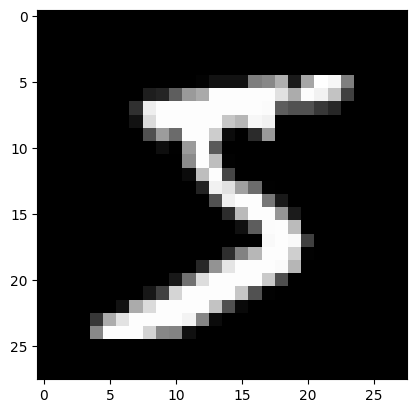

In [11]:
import matplotlib.pyplot as plt 

plt.imshow(tr_images[0], cmap='grey')

In [12]:
tr_images.shape # 60k images each of which is shape 28x28

torch.Size([60000, 28, 28])

In [13]:
28*28

784

In [14]:
tr_images[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [5]:
from torchsummary import summary
discriminator = Discriminator().to(device)
summary(discriminator, torch.zeros(1, 784));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1]                   --
|    └─Linear: 2-1                       [-1, 1024]                803,840
|    └─LeakyReLU: 2-2                    [-1, 1024]                --
|    └─Dropout: 2-3                      [-1, 1024]                --
|    └─Linear: 2-4                       [-1, 512]                 524,800
|    └─LeakyReLU: 2-5                    [-1, 512]                 --
|    └─Dropout: 2-6                      [-1, 512]                 --
|    └─Linear: 2-7                       [-1, 256]                 131,328
|    └─LeakyReLU: 2-8                    [-1, 256]                 --
|    └─Dropout: 2-9                      [-1, 256]                 --
|    └─Linear: 2-10                      [-1, 1]                   257
|    └─Sigmoid: 2-11                     [-1, 1]                   --
Total params: 1,460,225
Trainable params: 1,460,225
Non-trainable par

### Note
- Define generator class.  
- Generator generates 100 dimensional input of random noise and generates an image out of it
- Finally, check out the summary of the generator class

In [5]:
# Define generator class.  Generator generates 100 dimensional input of random noise and generates an image out of it
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100,256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 784),
            nn.Tanh()
        )
    def forward(self, x):
        return self.model(x)

In [ ]:
summary()

In [16]:
generator = Generator().to(device)
summary(generator, torch.zeros(1, 100));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 784]                 --
|    └─Linear: 2-1                       [-1, 256]                 25,856
|    └─LeakyReLU: 2-2                    [-1, 256]                 --
|    └─Linear: 2-3                       [-1, 512]                 131,584
|    └─LeakyReLU: 2-4                    [-1, 512]                 --
|    └─Linear: 2-5                       [-1, 1024]                525,312
|    └─LeakyReLU: 2-6                    [-1, 1024]                --
|    └─Dropout: 2-7                      [-1, 1024]                --
|    └─Linear: 2-8                       [-1, 784]                 803,600
|    └─Tanh: 2-9                         [-1, 784]                 --
Total params: 1,486,352
Trainable params: 1,486,352
Non-trainable params: 0
Total mult-adds (M): 2.97
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 5.67
Estimated Total Size 

- Define a function to generate noise and register it to device
- Define a function to train the discriminator network and generator network
- In discriminator, when we train the discriminator loss on real data, we expect the discriminator to predict an output of 1 (it should identify it as real data) and 0 as fake data
- In discriminator, when we train the discriminator loss on fake data, we expectd the discriminator to predict an output of 0 (which is fake)


In [17]:
def generate_noise(size):
    n = torch.randn(size, 100)
    return n.to(device)

In [18]:
def train_discriminator_network(discriminator, real_data, fake_data, d_optim: torch.optim, loss_fn):
    d_optim.zero_grad()
    pred_real = discriminator(real_data)
    expected_real = torch.ones(len(real_data), 1).to(device)
    loss_real = loss_fn(pred_real, expected_real)
    loss_real.backward()
    # predict on fake data
    pred_fake = discriminator(fake_data)
    expected_fake = torch.zeros(len(fake_data), 1).to(device)
    loss_fake = loss_fn(pred_fake, expected_fake)
    loss_fake.backward()
    d_optim.step()
    return loss_real.item() + loss_fake.item()

- Train the generator network

In [19]:
def train_generator_network(generator, fake_data, g_optim: torch.optim, loss_fn):
    g_optim.zero_grad()
    pred_fake = discriminator(fake_data)
    # calculate generator loss by passing fake prediction and 
    # expected value as ones since we want to fool the discriminator to output value of 1 when training the generator
    loss = loss_fn(pred_fake, 
                   torch.ones(len(fake_data), 1).to(device))
    loss.backward()
    g_optim.step()
    return loss.item()


In [6]:

discriminator = Discriminator().to(device)
generator = Generator().to(device)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
loss_fn = nn.BCELoss()
num_epochs = 200
log = ts.Report(num_epochs)
mnist_dl = DataLoader(mnist, batch_size=128, shuffle=True, drop_last=True)


In [7]:
mnist_dl

In [1]:
DataLoader

NameError: name 'DataLoader' is not defined

EPOCH: 1.000  d_loss: 0.698  g_loss: 3.561  (394.66s - 78538.28s remaining))))
EPOCH: 2.000  d_loss: 0.467  g_loss: 6.085  (406.47s - 40240.41s remaining))
EPOCH: 3.000  d_loss: 0.752  g_loss: 3.443  (418.30s - 27468.11s remaining))
EPOCH: 4.000  d_loss: 0.889  g_loss: 3.023  (430.13s - 21076.27s remaining)
EPOCH: 5.000  d_loss: 0.625  g_loss: 2.676  (441.91s - 17234.54s remaining)
EPOCH: 6.000  d_loss: 0.398  g_loss: 3.574  (453.70s - 14669.49s remaining)
EPOCH: 7.000  d_loss: 0.415  g_loss: 3.482  (465.52s - 12835.10s remaining)
EPOCH: 8.000  d_loss: 0.390  g_loss: 3.569  (477.25s - 11454.03s remaining)
EPOCH: 9.000  d_loss: 0.474  g_loss: 2.997  (488.99s - 10377.49s remaining)
EPOCH: 10.000  d_loss: 0.531  g_loss: 2.862  (500.82s - 9515.53s remaining)
EPOCH: 11.000  d_loss: 0.503  g_loss: 2.891  (512.64s - 8808.06s remaining)
EPOCH: 12.000  d_loss: 0.550  g_loss: 2.678  (524.44s - 8216.17s remaining)
EPOCH: 13.000  d_loss: 0.594  g_loss: 2.491  (536.19s - 7712.89s remaining)
EPOCH: 

100%|██████████| 301/301 [00:02<00:00, 125.84it/s]


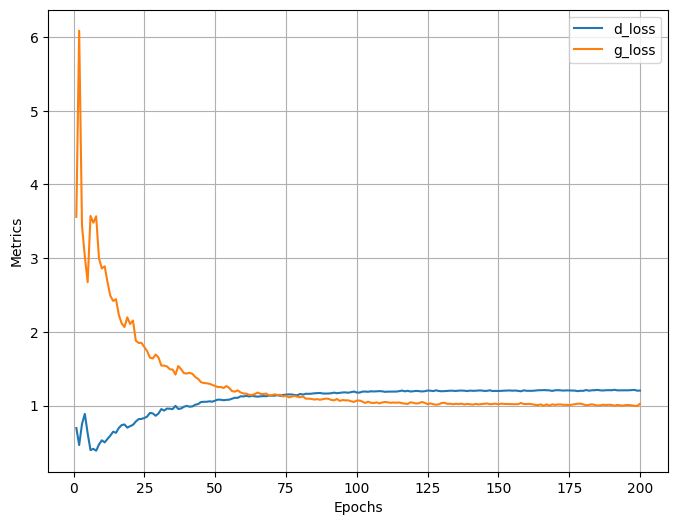

In [65]:
n = len(mnist_dl)
for epoch in range(num_epochs):
    for idx, (xbatch, ybatch) in enumerate(mnist_dl):
        # better to do this step in a dataset preprocessing
        real_data = xbatch.view(len(xbatch), -1).to(device)
        noise = generate_noise(len(real_data))
        fake_data = generator(noise).to(device)
        # create fresh tensor so that when backward() is called in discriminator function, it doesn't affect
        # tensors in the generator which creates fakes data
        fake_data = fake_data.detach()
        # train discriminator 
        dloss = train_discriminator_network(discriminator, real_data, fake_data, d_optimizer, loss_fn)
        # train generator
        # generate new set of fake images from noisy data and train generator
        noise = generate_noise(len(real_data))
        fake_data = generator(noise).to(device)
        gloss = train_generator_network(generator, fake_data, g_optimizer, loss_fn)
        log.record(epoch + (1 + idx)/n, d_loss=dloss, g_loss=gloss, end='\r')
    log.report_avgs(epoch + 1)

log.plot_epochs(['d_loss', 'g_loss'])


### Visualization of fake data

In [126]:
z.shape

torch.Size([64, 100])

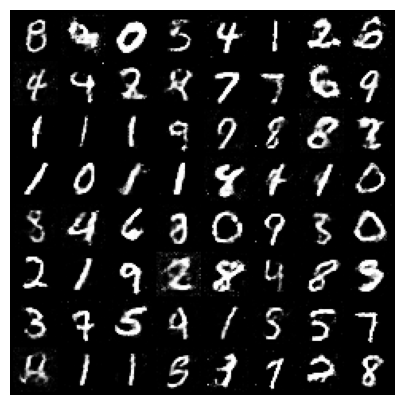

In [66]:
from torchvision.utils import make_grid
z = torch.randn(64, 100).to(device)
sample_images = generator(z).data.cpu().view(64, 1, 28, 28)
grid = make_grid(sample_images, nrow=8, normalize=True)
ts.show(grid.cpu().detach().permute(1, 2, 0), sz=5)

- As one can see, we can use GANs to generate images that are realistic but still have room for improvement
- In next section, we will use deep convolutional GANs to generate more realistic images

## Using Deep Convolutional Generative Advesarial Networks (DCGANs) to generate face images
- DCGANs use convolution and pooling operations in the GAN model
- CNNs perform gbetter in context of images when compared to vanilla neural networks
- Recall that CNNs require input in the form of batch size x channels x height x width
- so we will need to generate an image using random set of 100 numbers hence it will be a batch_size x 100 x 1 x 1 (100 channels)
- Convert the generated noise into an image using ConvTranspose2d
- ConvTranspose2d is opposite of convolution where it takes input with a smaller feature map size (height x width) and upsamples it to that of a larger size using a predefined kernel size, stride and padding.  Hence we can convert a vector of shape batch_size x 100 x 1 x 1 into shape of batch size 3 x 64 x 64.  Henc we have taken a random noise of size 100 and converted it to an image of a face

## Downloading faces

In [21]:
import glob
from PIL import Image
folder = os.path.join(os.getcwd(), 'cv_with_pytorch', 'datasets', 'male_female_faces')


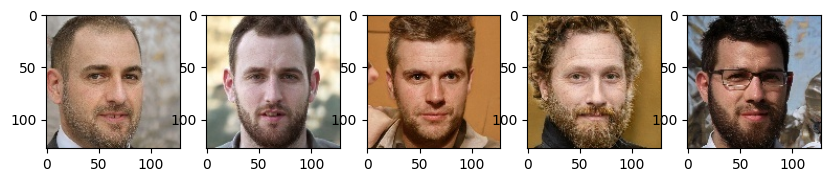

In [22]:
import random


folder
males = glob.glob(folder + '/males/*.jpg')
n = len(males)

plt.figure(figsize=(10,10))
plt.subplot(151)
idx = random.randint(0, n)
img = Image.open(males[idx])
plt.imshow(img, cmap='gray');
plt.subplot(152)
idx = random.randint(0, n)
img = Image.open(males[idx])
plt.imshow(img, cmap='gray');
plt.subplot(153)
idx = random.randint(0, n)
img = Image.open(males[idx])
plt.imshow(img, cmap='gray');
plt.subplot(154)
idx = random.randint(0, n)
img = Image.open(males[idx])
plt.imshow(img, cmap='gray');
plt.subplot(155)
idx = random.randint(0, n)
img = Image.open(males[idx])
plt.imshow(img, cmap='gray');


- lets crop the picture so that we only retain the face and discard everything else in the background.  
- Use cascade filter from opencv which helps in identifying images within a picture

In [24]:
import numpy as np 
np.asarray(img).shape

(128, 128, 3)

In [25]:
np.asarray(img).reshape(3, 128, 128).shape

(3, 128, 128)

In [115]:
import cv2
folder = os.path.join(os.getcwd(), 'cv_with_pytorch', 'datasets', 'male_female_faces')
females = glob.glob(folder + '/females/*.jpg')
males = glob.glob(folder+'/males/*.jpg')
file_list = females + males 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
for idx, file in enumerate(file_list):
    img = ts.read(file, 1)
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    for (x,y,w,h) in faces:
        img2 = img[y:(y+h), x: (x+w), :]
    cv2.imwrite(folder+'/cropped_faces/' + str(idx)+'.jpg',
                cv2.cvtColor(img2, cv2.COLOR_RGB2BGR))

In [26]:
cropped_faces = glob.glob(folder + '/cropped_faces/*.jpg')

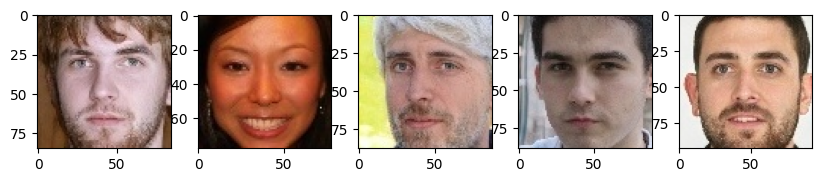

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(151)
idx = random.randint(0, n)
img = Image.open(cropped_faces[idx])
plt.imshow(img, cmap='gray');
plt.subplot(152)
idx = random.randint(0, n)
img = Image.open(cropped_faces[idx])
plt.imshow(img, cmap='gray');
plt.subplot(153)
idx = random.randint(0, n)
img = Image.open(cropped_faces[idx])
plt.imshow(img, cmap='gray');
plt.subplot(154)
idx = random.randint(0, n)
img = Image.open(cropped_faces[idx])
plt.imshow(img, cmap='gray');
plt.subplot(155)
idx = random.randint(0, n)
img = Image.open(cropped_faces[idx])
plt.imshow(img, cmap='gray');

In [28]:
np.asarray(img).shape

(93, 93, 3)

In [29]:
import glob
import random



transform = transforms.Compose([
    transforms.Resize(64),
    transforms.CenterCrop(64),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
class Faces(Dataset):
    def __init__(self, folder, transform=None):
        self.file_list = glob.glob(folder + '/cropped_faces/*.jpg')
        
        random.shuffle(self.file_list)
        self.transform = transform

    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        img = Image.open(self.file_list[idx])
        if self.transform is not None:
            img = self.transform(img)
        return img

def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


In [134]:
faces_ds = Faces(folder=folder, transform=transform)
faces_dl = DataLoader(faces_ds, batch_size=64, shuffle=True, num_workers=8)

In [138]:
face = next(iter(faces_ds))
face.shape


torch.Size([3, 64, 64])

In [137]:
face.shape

torch.Size([3, 64, 64])

- define a discriminator class that takes an image of shape batch size x 3 x 64 x 64

In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 64*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64*2,64*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64*4, 64*8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64*8,1, 4, 1, 0, bias=False),
            nn.Sigmoid(),
        )
        self.apply(weights_init)
    
    def forward(self, input):
        return self.model(input)

In [32]:
discriminator = Discriminator().to(device)
summary(discriminator, torch.zeros(1, 3, 64, 64));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 1, 1]             --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          3,072
|    └─LeakyReLU: 2-2                    [-1, 64, 32, 32]          --
|    └─Conv2d: 2-3                       [-1, 128, 16, 16]         131,072
|    └─BatchNorm2d: 2-4                  [-1, 128, 16, 16]         256
|    └─LeakyReLU: 2-5                    [-1, 128, 16, 16]         --
|    └─Conv2d: 2-6                       [-1, 256, 8, 8]           524,288
|    └─BatchNorm2d: 2-7                  [-1, 256, 8, 8]           512
|    └─LeakyReLU: 2-8                    [-1, 256, 8, 8]           --
|    └─Conv2d: 2-9                       [-1, 512, 4, 4]           2,097,152
|    └─BatchNorm2d: 2-10                 [-1, 512, 4, 4]           1,024
|    └─LeakyReLU: 2-11                   [-1, 512, 4, 4]           --
|    └─Conv2d: 2-12                      [-1, 1, 1, 1]      

- Define a generator that generates fake images from an input of shape batch_size x 100 x 1 x 1
- Note that we used ConvTranspose2d to gradually upsample an array so that it closely resembles an image

In [36]:
discriminator(torch.zeros(1,3,64,64))

tensor([[[[0.5000]]]], grad_fn=<SigmoidBackward0>)

In [184]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(100, 64*8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64*8),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*8, 64*4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*4),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*4, 64*2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64*2),
            nn.ReLU(True),
            nn.ConvTranspose2d(64*2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )
        self.apply(weights_init)
    def forward(self, x):
        return self.model(x)

In [30]:
!

AttributeError: module 'torchsummary' has no attribute '__version__'

In [185]:
generator = Generator().to(device)
summary(generator, torch.zeros(1, 100, 1, 1));

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3, 64, 64]           --
|    └─ConvTranspose2d: 2-1              [-1, 512, 4, 4]           819,200
|    └─BatchNorm2d: 2-2                  [-1, 512, 4, 4]           1,024
|    └─ReLU: 2-3                         [-1, 512, 4, 4]           --
|    └─ConvTranspose2d: 2-4              [-1, 256, 8, 8]           2,097,152
|    └─BatchNorm2d: 2-5                  [-1, 256, 8, 8]           512
|    └─ReLU: 2-6                         [-1, 256, 8, 8]           --
|    └─ConvTranspose2d: 2-7              [-1, 128, 16, 16]         524,288
|    └─BatchNorm2d: 2-8                  [-1, 128, 16, 16]         256
|    └─ReLU: 2-9                         [-1, 128, 16, 16]         --
|    └─ConvTranspose2d: 2-10             [-1, 64, 32, 32]          131,072
|    └─BatchNorm2d: 2-11                 [-1, 64, 32, 32]          128
|    └─ReLU: 2-12                        [-1, 64, 32, 32]

In [190]:
def train_discriminator_network(discriminator, real_data, fake_data, d_optim: torch.optim, loss_fn):
    d_optim.zero_grad()
    pred_real = discriminator(real_data)
    expected_real = torch.ones(len(real_data), 1).to(device)
    loss_real = loss_fn(pred_real.squeeze(), expected_real.squeeze())
    loss_real.backward()
    # predict on fake data
    pred_fake = discriminator(fake_data)
    expected_fake = torch.zeros(len(fake_data), 1).to(device)
    loss_fake = loss_fn(pred_fake.squeeze(), expected_fake.squeeze())
    loss_fake.backward()
    d_optim.step()
    return loss_real.item() + loss_fake.item()


def train_generator_network(generator, fake_data, g_optim: torch.optim, loss_fn):
    g_optim.zero_grad()
    pred_fake = discriminator(fake_data)
    # calculate generator loss by passing fake prediction and 
    # expected value as ones since we want to fool the discriminator to output value of 1 when training the generator
    fake_real = torch.ones(len(real_data), 1).to(device)
    loss = loss_fn(pred_fake.squeeze(), 
                   fake_real.squeeze())
    loss.backward()
    g_optim.step()
    return loss.item()

In [191]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)
loss_fn = nn.BCELoss()
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))

faces_ds = Faces(folder=folder, transform=transform)
faces_dl = DataLoader(faces_ds, batch_size=64, shuffle=True)
num_epochs = 25

In [192]:
def generate_noise(size):
    rnd = torch.randn(size, 100, 1, 1)
    return rnd.to(device)

EPOCH: 1.000  d_loss: 0.633  g_loss: 9.198  (54.94s - 1318.57s remaining))
EPOCH: 2.000  d_loss: 0.558  g_loss: 5.822  (104.07s - 1196.83s remaining))
EPOCH: 3.000  d_loss: 0.492  g_loss: 5.077  (153.03s - 1122.23s remaining))
EPOCH: 4.000  d_loss: 0.569  g_loss: 4.146  (202.16s - 1061.32s remaining))
EPOCH: 5.000  d_loss: 0.568  g_loss: 3.761  (251.32s - 1005.28s remaining)
EPOCH: 6.000  d_loss: 0.592  g_loss: 3.445  (300.39s - 951.24s remaining))
EPOCH: 7.000  d_loss: 0.639  g_loss: 3.352  (349.50s - 898.71s remaining))
EPOCH: 8.000  d_loss: 0.601  g_loss: 3.261  (398.54s - 846.90s remaining)
EPOCH: 9.000  d_loss: 0.624  g_loss: 3.125  (447.56s - 795.66s remaining)
EPOCH: 10.000  d_loss: 0.607  g_loss: 3.093  (496.56s - 744.85s remaining)
EPOCH: 11.000  d_loss: 0.573  g_loss: 3.150  (545.81s - 694.67s remaining)
EPOCH: 12.000  d_loss: 0.591  g_loss: 3.139  (594.88s - 644.45s remaining)
EPOCH: 13.000  d_loss: 0.567  g_loss: 3.171  (643.84s - 594.31s remaining)
EPOCH: 14.000  d_loss: 0

100%|██████████| 126/126 [00:00<00:00, 699.53it/s]


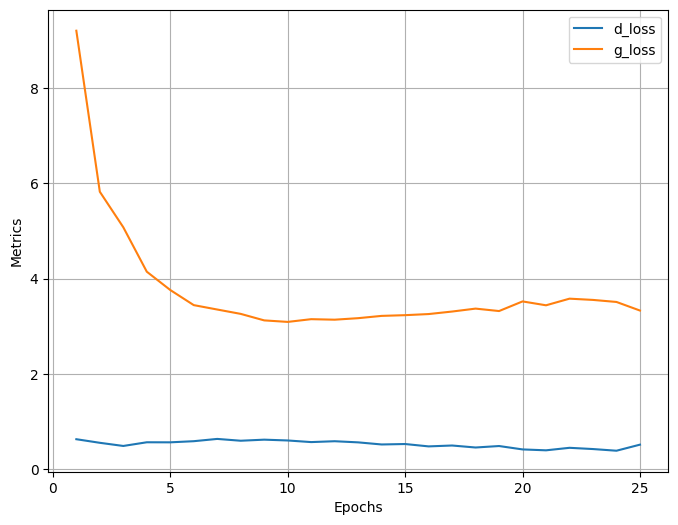

In [193]:
n = len(faces_dl)
log = ts.Report(num_epochs)
for epoch in range(num_epochs):
    for idx, images in enumerate(faces_dl):
        # better to do this step in a dataset preprocessing
        real_data = images.to(device)
        noise = generate_noise(len(real_data))
        fake_data = generator(noise).to(device)
        # create fresh tensor so that when backward() is called in discriminator function, it doesn't affect
        # tensors in the generator which creates fakes data
        fake_data = fake_data.detach()
        # train discriminator 
        dloss = train_discriminator_network(discriminator, real_data, fake_data, d_optimizer, loss_fn)
        # train generator
        # generate new set of fake images from noisy data and train generator
        noise = generate_noise(len(real_data))
        fake_data = generator(noise).to(device)
        gloss = train_generator_network(generator, fake_data, g_optimizer, loss_fn)
        log.record(epoch + (1 + idx)/n, d_loss=dloss, g_loss=gloss, end='\r')
    log.report_avgs(epoch + 1)

log.plot_epochs(['d_loss', 'g_loss'])

- Notice that in here, variation in generator and discriminator loss does not have the same pattern as the handwritten digit generation due to following:
    1. Currently, the images are larger (64x64x3) in shape compared to 28x28x1 in shape
    2. Digits have fewer variations when compared to features that are present on the image of a face
    3. Information in handwritten digits is available in only a minority of pixels when compared to information in images of a face

- Lets generate a sample of images using fake data:

In [204]:
sample_images.shape

torch.Size([64, 3, 64, 64])

noise shape: torch.Size([64, 100, 1, 1])


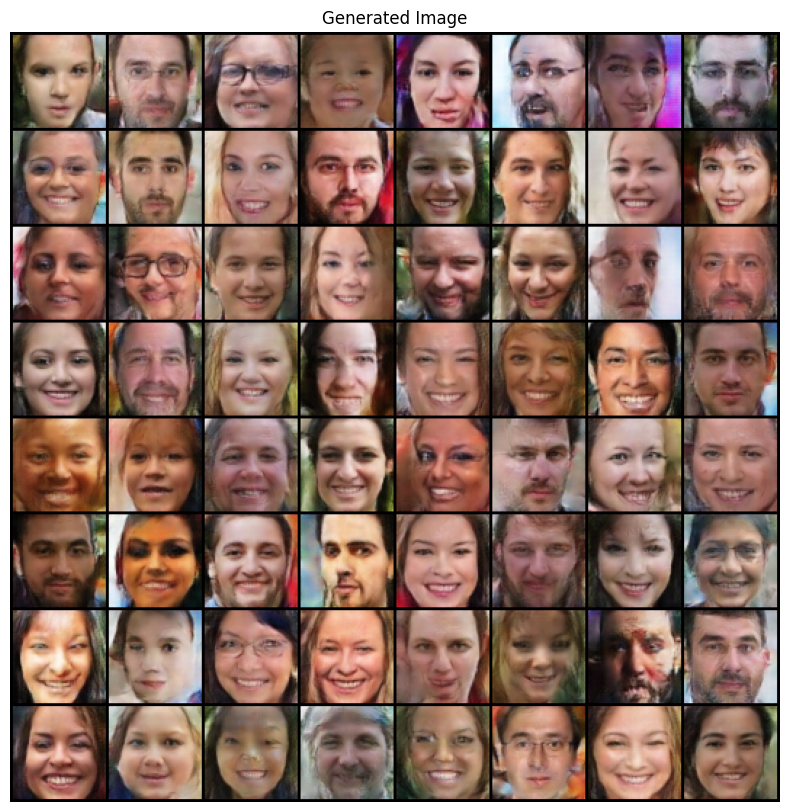

In [203]:
generator.eval();
noise = generate_noise(64).to(device)
# 64 samples each containing 100 color channels each of size 1x1
print(f"noise shape: {noise.shape}")
sample_images = generator(noise).detach().cpu()
grid = make_grid(sample_images, nrow=8, normalize=True);
ts.show(grid.cpu().detach().permute(1,2,0), sz=10, title='Generated Image');



- Generated Images from random noise is decent but not sufficiently realistic.  One possible reason is that all people's face images dont have the same alignment.  
- Perhaps train DCGAN only on those images whose face is not tilted and person is looking straight into the camera.  

## Conditional GANs
- We need to learn how to generate image of a particular class
- Imagine a scenario where we need to gewnerate an image of a class of oir interest, for example, an image of cat or an image of a dog or image of a man with spectacles.  
- How do we specify that we want to generate an image of interest to us? 
- Use conditional GANs

- We need to assume that we have images of males and female faces along with their corresponding labels.  We will generate image of a specified class of interest from random noise

The strategy we will employ is as follows:
1. Specify the label of the image we want to generate as a one hot encoded version
2. pass the label through an embedding layer to generate a multi-dimensional representation of each class
3. generate random noise and concatenate with teh embedding layer generated in previous step
4. train the model like we did in previous sections, but this time with a noise vector concatenated with the embedding of the class of image we wish to generate

In [202]:
next(iter(faces_dl))

torch.Size([1, 1])

In [ ]:
nn.Conv2d()